<a name="introduction"></a>
## Introduction: A/B Testing



> A/B Testing is a term for a randomized experiment with two variants, A and B. These tests consist of test design, data collection, and data analysis stages.

The most common use of A/B testing is to audition proposed changes to a website. Once the variants are designed, data is collected by assigning users to 'test' and 'control' groups, which will dictate the version of the site they will be served. The data that is collected is then analysed to decide if the change should be pushed to the site.

An example of this is shown in the below graphic taken from www.vwo.com, a third parting A/B testing utility.

![](./assets/images/ab_test1.png)

It's very important when designing an A/B test to make the smallest change possible before testing the variant. Widespread changes introduce a slew of variables that will be impossible to track in most cases. Some examples of A/B tests that one might conduct are:

- Changing the number of images on a page
- Changing the font on a page
- Adding or removing single elements from a page
- Altering the text on a button
- Re-organizing a pages content

**Check:** Consider an e-commerce site. What must be taken into account when designing, conducting, and analysing an A/B test?

> Answer: The main effect in e-commerce is the flow of the user through the conversion funnel. Once users land on the site, test to see if the variant has any effect on how many products they view, how many products are added to cart, changes in cart abandonment rates, changes in conversion rates, order volume, average order value, etc.


<a name="intro-design"></a>
## Introduction: A/B Test Design 

An A/B test is only as good as its design. Designing the test involves asking these four questions:

### 1. What element(s) will be changed?

While working with a PM, you will likely have little say in what elements are changed for a test. Keep in mind that to prevent false correlations in the data, the smallest changes possible will likely have the most meaningful results.


### 2. Who will be a part of the test group?

Will you be splitting the incoming traffic 50/50 between variants, or can you get away with serving the variant under test to a smaller group? Also, will the test split change? We'll discuss one strategy for assigning test groups in the next section.

### 3. How long will the test run?

This is a very important question to ask. If the test doesn't run long enough, your data won't be useful. If it runs too long, that can impact business needs. 
Remember back to Week 9's Time Series Analysis lessons- ensure that you have enough data to capture across multiple periods, or seasons, but not too much data that your result will be heavily affected by trend.

### 4. Why is this test truly necessary?

A/B testing is a gamble. If the business result of the test is less valuable than the possible negative effects on churn or conversion rate, then it might be worth re-evaluating your design.

## Multi-Arm Bandit Testing

A traditional A/B test is done by splitting traffic between variants 50/50. A newer approach is the _Multi-Arm Bandit_. 

In this strategy, traffic is split as such:
- **Exploration Phase**: During the first ~10% of the test, traffic is split 50/50. This phase picks a short-term 'winner', and a short-term 'loser'.
- **Exploitation Phase**: For the remainder of the test, shift the majority of traffic to the higher performing variant. Continue to adjust traffic as performance increases/decreases.

The Multi-Arm Bandit approach is championed by many big companies, primarily Google. In the [Additional Resources](#add-res) section below, there's a nice article on Google's strategy.

**Check:** What do you think the pros and cons of this model are?

In practice, Multi-Arm Bandit testing does a fairly good job of optimizing conversion rates. The downside to this method, however, is increased difficulty in evaluation of results. Simply picking a 'winner' variant is not always the best strategy, especially since the 'loser' variant often gets so little traffic that it can be hard to validate the statistical significance of the lift. 

To shed more light on the importance of controlling your traffic flow through variants, let's look at how these tests are analyzed.


<a name="intro-analysis"></a>
## Introduction: Test Analysis Strategies 

**Check:** How do you think we would analyse the results of an A/B test?

Consider an e-commerce example. Two variants are created, and after the appropriate data collection period has passed, you've found that the test variant has a higher conversion rate than the control. Does that automatically mean that the variant is better? Why or why not?

There are many means by which we can analyse the results of our test. They are not always interchangeable, as some heuristics are more meaningful than others given the circumstance. The end result is usually the same- to test whether or not the difference between variants is statistically significant, or if it is just a fluke.

<a name="demo-ttest"></a>
## Demo: _T_-tests 

Also referred to as the Student's _t_-test, it is one of the most commonly used techniques for testing a null hypothesis on the basis of a difference between sample means. By testing the means of two samples derived from the same source, the _t_-test determines a probability that two populations are the same with respect to the variable tested. In an A/B test, this will tell us if the difference in the target metric is accidental, or _statistically significant_.

![](./assets/images/ttest-formula.png)

**Check:** The output of a _t_-test is a _p_ value. Do you recall the significance of _p_ values? What range of _p_ values indicate statistical significance?

_t_-tests can be either _one-tailed_ or _two-tailed_. This refers to whether or not the change is measure in two directions, or only one. Visually, this looks like:

**One-Tailed**:
![one-tailed](./assets/images/1tailed.gif)

**Two-Tailed**:
![two-tailed](./assets/images/2tailed.gif)


Let's look at how we would model the Student's _t_-test in Python in the [`ab_testing.ipynb`](./assets/code/solution-code/ab_testing.ipynb) notebook.



<a name="code-ztest"></a>
## Guided Practice/Codealong: _Z_-tests 

The _z_-tests is another method used to analyse test results. Use of a _z_-test is possible when the observed data can be decided to follow a Normal distribution with _unknown mean_ and _known variance_. The output of a _z_-test is the _z_-statistic, which represents the number of standard deviations  and its corresponding _p_-value. It is defined as such: 

![](./assets/images/ztest-formula.png)

While `statsmodels` does have a built in method for calculating _z_ values, we're going to build our own based on the above formula. 





# LAB - A/B Testing

In [1]:
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline

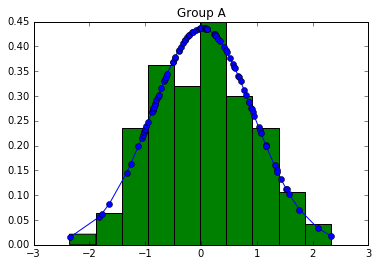

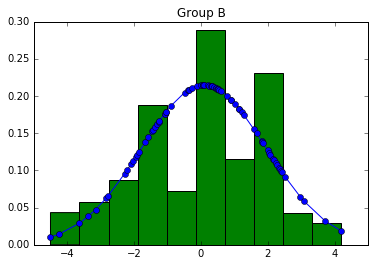

Ttest_indResult(statistic=-0.28381897794166749, pvalue=0.77687896981285487)

In [2]:
# Generate data
a = sorted(np.random.randn(100))
b = sorted(np.random.randn(1) * np.random.randn(80))

# Plot distribution of A
fit = stats.norm.pdf(a, np.mean(a), np.std(a))
pl.plot(a,fit,'-o')
pl.hist(a,normed=True) 
pl.title('Group A')
pl.show()

# Plot distribution of B
fit = stats.norm.pdf(b, np.mean(b), np.std(b))
pl.plot(b,fit,'-o')
pl.hist(b,normed=True) 
pl.title('Group B')
pl.show()

# Perform T-test
stats.ttest_ind(a, b)


## Running a Z-Test

In [3]:
# Defining the function for a Z-test:

def ztest(x1, n1, x2, n2, one_tailed=False):
    """
    One- or Two-Tailed Z-test for two samples
    
    Args:
        x1 = # of successes in Sample 1
        n1 = # of observations in Sample 1
        x2 = # of successes in Sample 2
        n2 = # of observations in Sample 2
        one_tailed = Boolean, whether or not the test should be One-Tailed
        
    Return:
        z = Z-stat
    """
    x1 = float(x1)
    n1 = float(n1)
    x2 = float(x2)
    n2 = float(n2)
 
    p1 = x1 / n1
    p2 = x2 / n2    
 
    p = (x1 + x2) / (n1 + n2)
    se = p * (1 - p) * ((1 / n1) + (1/ n2))
    sse = np.sqrt(se)
    
    z = (p1 - p2) / sse
    p = 1 - stats.norm.cdf(abs(z))
    
    if not one_tailed:
        p *= 2
        
    return z, p

In [4]:
# Do a Z - test with fake data:

control_observations = 3141 #n1
control_successes = 1904 # x1
test_observations = 3241 #n2
test_successes = 2134 #x2

ztest(control_successes, control_observations, test_successes, test_observations, one_tailed=False)

(-4.3299120715441166, 1.4916889162330804e-05)

## Experimental data from an email campaign

Use the dataset: Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv
Details of the dataset can be found here: http://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html

Note that we have 3 segments:

- Womens E-Mail
- Mens E-Mail
- No E-Mail (control)

Incremental sales are those sales that can be attributed to the marketing campagin above/(below) what would have resulted if there was no intervention (email). 

Recall that to get incremental sales you first need to calculate the uplift rate for that segment, then use that uplift rate to determine how many of the actual sales were due to the campaign. The uplift rate is determined by the conversion rate (treatment) - conversion rate (control). 

You can use statsmodels instead of the ztest function we wrote above if you prefer.

In [5]:
## Read in the data
import pandas as pd
hill = pd.read_csv("Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv")

In [6]:
hill.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0


#### Q1) Which e-mail campaign performed the best, the Mens version, or the Womens version?

In [13]:
print hill.segment.value_counts()
print hill[hill.segment=='Womens E-Mail'].conversion.value_counts()
print hill[hill.segment=='Mens E-Mail'].conversion.value_counts()
print hill[hill.segment=='No E-Mail'].conversion.value_counts()

Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: segment, dtype: int64
0    21198
1      189
Name: conversion, dtype: int64
0    21040
1      267
Name: conversion, dtype: int64
0    21184
1      122
Name: conversion, dtype: int64


#### Q2) Are the results significant?

In [22]:
#hill_m = hill[hill.segment=='Mens E-Mail'].conversion
#hill_f = hill[hill.segment=='Womens E-Mail'].conversion

#stats.ttest_ind(a, b)

control_observations = 21184 #n1
control_successes = 122 # x1
men_observations = 21040 #n2
men_successes = 267 #x2
women_observations = 21198 #n2
women_successes = 189 #x2

print "Women Z-test"
print ztest(control_successes, control_observations, women_successes, women_observations, one_tailed=False)

print "Men Z-test"
print ztest(control_successes, control_observations, men_successes, men_observations, one_tailed=False)

print "Men vs Women Z-test"
print ztest(women_successes, women_observations, men_successes, men_observations, one_tailed=False)

Women Z-test
(-3.8073913196329103, 0.00014044042497785014)
Men Z-test
(-7.4535114279746448, 9.0816243414337805e-14)
Men vs Women Z-test
(-3.7529035142599176, 0.00017479814667820115)


#### Q3) How much incremental sales per customer did the Mens version of the e-mail campaign drive? 

#### Q4) How much incremental sales per customer did the Womens version of the e-mail campaign drive? 

-----

<a name="discussion1"></a>
## Discussion: A/B Test Case Study 1 - Obama's Fundraising Campaign 

One of the most popular case studies of A/B testing in recent memory was posted by [Optimizely](https://www.optimizely.com/) on their company blog. Optimizely is a 3rd party A/B testing tool which allows you to easily design, serve, and analyze website optimization tests. 

Go ahead and read the article [here](https://blog.optimizely.com/2010/11/29/how-obama-raised-60-million-by-running-a-simple-experiment/), and get ready to discuss afterwards.

Now that we've read the article, let's discuss. 

> Instructor's Note: Here are a few prompts. 
> - Why do you think this test worked?
> - What were the risks taken? Were they worth taking?
> - What next steps would you have taken if this test were still going?


<a name="discussion2"></a>
## Discussion: A/B Test Case Study 2 - AMD's Social Media Sharing 

A/B testing is a great way to continuously mine data about what people are interested in on social media. This next case study is about AMD, a semiconductor company responsible for creating some of the hardware that is likely in the computer you're using right now. In this case study, we will see how a simple change in placement had a major increase on social media sharing.

Go ahead and read the article [here](https://vwo.com/blog/amd-3600-social-sharing-increase/), and get ready to discuss afterwards.

Now that we've read the article, let's discuss. 

> Instructor's Note: Here are a few prompts. 
> - Why do you think this test worked?
> - What were the risks taken? Were they worth taking?
> - What next steps would you have taken if this test were still going?

https://vwo.com/blog/amd-3600-social-sharing-increase/


<a name="conclusion"></a>
## Conclusion 

A/B Testing is a key opportunity for Data Scientists to have a concrete effect on business outcomes. It requires more than just statistical formulas, as one must call on their business intuition and technical competency to full understand the results. The design, implementation, and analysis of an A/B test will typically be performed across functions, putting the Data Scientist in close contact with PM's, developers, and UX designers. If this kind of thing interests you, it would be a good idea to take some time and try out the third party tools that are available to you, such as Optimizely, Sitespect, VWO, etc. Many of them have demos on their sites, or if you're interested in web development, take the time to put together your own A/B testing tools. 

***

<a name="add-res"></a>
### ADDITIONAL RESOURCES

- [Google's Multi-Arm Bandit Strategy](https://support.google.com/analytics/answer/2844870?hl=en)
- [A/B Testing Case Studies](https://www.whichtestwon.com/case-studies/)